In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# from sklearn import tree
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVR
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt

dados = pd.read_csv("dados_artigo.csv",header=1)

In [11]:
## Ajustando a variável R
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
yr= np.array(dados["R(%)"])
X_train, X_test, yr_train, yr_test = train_test_split(X,  yr, test_size=0.2, random_state=None)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.MinMaxScaler(feature_range=(0, 1))


Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)

ys.fit(yr_train.reshape(-1, 1))
yr_train_norm = ys.transform(yr_train.reshape(-1, 1))
yr_test_norm = ys.transform(yr_test.reshape(-1, 1))

svrr = NuSVR(tol=1e-05,verbose=True,gamma="scale")
svrr.fit(X_train_norm,yr_train_norm.ravel())
svrr.score(X_test_norm,yr_test_norm.ravel())



[LibSVM]..........*
optimization finished, #iter = 3429
epsilon = 0.024048
obj = -6.026626, rho = -0.651430
nSV = 97, nBSV = 67


0.40173960226025274

In [ ]:
## Ajustando a variável Cf
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
ycf = np.array(dados["Cf (mg/L)"])
X_train, X_test, ycf_train, ycf_test = train_test_split(X,  ycf, test_size=0.2, random_state=None)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.MinMaxScaler(feature_range=(0, 1))


Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)

ys.fit(ycf_train.reshape(-1, 1))
ycf_train_norm = ys.transform(ycf_train.reshape(-1, 1))
ycf_test_norm = ys.transform(ycf_test.reshape(-1, 1))

svrcf = NuSVR(tol=1e-05,verbose=True,gamma="scale")
svrcf.fit(X_train_norm,ycf_train_norm.ravel())
svrcf.score(X_test_norm,ycf_test_norm.ravel())

In [ ]:
## Ajustando a variável q
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
yq = np.array(dados["q(mg/g)"])
X_train, X_test, yq_train, yq_test = train_test_split(X,  yq, test_size=0.2, random_state=None)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
# ys = preprocessing.StandardScaler()

# Xs = preprocessing.StandardScaler()
# ys = preprocessing.MinMaxScaler(feature_range=(0, 1))


Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)

ys.fit(ycf_train.reshape(-1, 1))
yq_train_norm = ys.transform(yq_train.reshape(-1, 1))
yq_test_norm = ys.transform(yq_test.reshape(-1, 1))

svrq = NuSVR(tol=1e-05,verbose=True,gamma="scale")
svrq.fit(X_train_norm,yq_train_norm.ravel())
svrq.score(X_test_norm,yq_test_norm.ravel())

In [12]:
yp = svrr.predict(X_test_norm)
res = pd.DataFrame()
res["dadosN"]=yr_test_norm.ravel()
res["preditoN"] = yp
res["dadosO"] = yr_test.ravel()
res["PreditoO"] = ys.inverse_transform(yp.reshape(-1, 1))
res

,dadosN,preditoN,dadosO,PreditoO
0,0.862285,0.869115,87.24,87.839597
1,0.774234,0.833420,79.51,84.705912
2,0.840529,0.793105,85.33,81.166721
3,0.817519,0.769435,83.31,79.088678
4,0.846110,0.864174,85.82,87.405799
5,0.810343,0.828881,82.68,84.307455
6,0.794851,0.766036,81.32,78.790266
7,0.572730,0.616537,61.82,65.665758
8,0.654516,0.625618,69.00,66.463028
9,0.717166,0.674881,74.50,70.787810


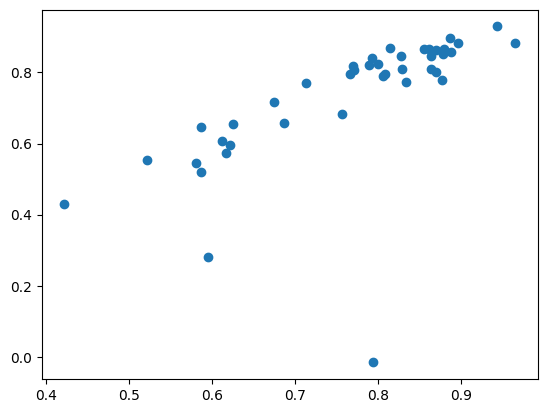

In [13]:
plt.scatter(yp,yr_test_norm.ravel())